In [14]:
from aocd import get_data
data = get_data(day=13, year=2023)

In [19]:
data = '''#.##..##.
..#.##.#.
##......#
##......#
..#.##.#.
..##..##.
#.#.##.#.

#...##..#
#....#..#
..##..###
#####.##.
#####.##.
..##..###
#....#..#'''

In [131]:
import numpy as np
from scipy import ndimage
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [60]:
def render(i):
    plt.axis('off')
    plt.imshow(i, cmap='hot', interpolation='none')

In [20]:
boards = [ np.array([ list(y) for y in x.splitlines() ]) for x in data.split('\n\n') ]

array([[1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 1, 0, 1, 0]])

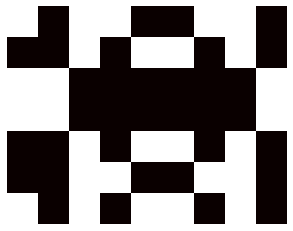

In [154]:
board = boards[0]


In [202]:
def split(board, axis=1):
    side = board.shape[axis]
    min_sides = math.floor(side/2)
    to_cut = side - (min_sides*2)
    
    if axis == 1:
        slices = [board[:,to_cut:], board[:,:to_cut*-1]]
    else:
        slices = [board[to_cut:], board[:to_cut*-1]]
    for s in slices:
        yield np.split(s, 2, axis=axis)

def equals(l, r, axis=1):
    if axis == 0:
        return (l == r[...,:,::-1]).all()
    else:
        return (l == r[...,::-1,:]).all()

for board in boards:
    #board = np.where(board == '#', 1, 0)
    for a in 0,1:
        for l, r in split(board, axis=a):
            print('l', l)
            print('r', r)
            print('')
            if equals(l, r, a):
                print('got it')
    break
    # try to 

l [['.' '.' '#' '.' '#' '#' '.' '#' '.']
 ['#' '#' '.' '.' '.' '.' '.' '.' '#']
 ['#' '#' '.' '.' '.' '.' '.' '.' '#']]
r [['.' '.' '#' '.' '#' '#' '.' '#' '.']
 ['.' '.' '#' '#' '.' '.' '#' '#' '.']
 ['#' '.' '#' '.' '#' '#' '.' '#' '.']]

l [['#' '.' '#' '#' '.' '.' '#' '#' '.']
 ['.' '.' '#' '.' '#' '#' '.' '#' '.']
 ['#' '#' '.' '.' '.' '.' '.' '.' '#']]
r [['#' '#' '.' '.' '.' '.' '.' '.' '#']
 ['.' '.' '#' '.' '#' '#' '.' '#' '.']
 ['.' '.' '#' '#' '.' '.' '#' '#' '.']]

l [['.' '#' '#' '.']
 ['.' '#' '.' '#']
 ['#' '.' '.' '.']
 ['#' '.' '.' '.']
 ['.' '#' '.' '#']
 ['.' '#' '#' '.']
 ['.' '#' '.' '#']]
r [['.' '#' '#' '.']
 ['#' '.' '#' '.']
 ['.' '.' '.' '#']
 ['.' '.' '.' '#']
 ['#' '.' '#' '.']
 ['.' '#' '#' '.']
 ['#' '.' '#' '.']]

l [['#' '.' '#' '#']
 ['.' '.' '#' '.']
 ['#' '#' '.' '.']
 ['#' '#' '.' '.']
 ['.' '.' '#' '.']
 ['.' '.' '#' '#']
 ['#' '.' '#' '.']]
r [['.' '.' '#' '#']
 ['#' '#' '.' '#']
 ['.' '.' '.' '.']
 ['.' '.' '.' '.']
 ['#' '#' '.' '#']
 ['.' '.' '#

In [173]:
slice(1, 9)

slice(1, 9, None)

In [168]:
side = board.shape[1]
min_sides = math.floor(side/2)
to_cut = side - (min_sides*2)

l, r = np.split(board[:,to_cut:], 2, axis=1)
if (l == r[...,:,::-1]).all():
    print('yes')

yes


In [142]:
min_sides = math.floor(board.shape[0]/2)
to_cut = board.shape[0] - (min_sides*2)

l, r = np.split(board[to_cut:], 2)
if (l == r[...,::-1,:]).all():
    print('yes mirror')
else:
    l, r = np.split(board[:to_cut], 2)
    if (l == r[...,::-1,:]).all():
        print('yes mirror other')

yes mirror
